# Project: No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The No Show Appointments Dataset has over than 100 thousand records for booking medical appointments. These appointments are for clinics in Brazil. The dataset records whether a patient has showed up for an appointment or not along side other characteristics such as gender, age and appointment day.

Questions that are planned to be explored over the course of this report:
- Is gender associated with no show appointments?
- Does age has a correlation with no show appointments?
- Which age group is associated with no show appointments?
- Are no show appointments associated with a certain day of the week?

First, very useful python libraries are imported such Numpy and Pandas.
Also, a magic method is used to plot graphs within this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

This code uses Pandas to read from a CSV file that has the no show appointment dataset. The dataset is loaded as a dataframe and a few lines are printed to get an initial idea about the dataset.

In [2]:
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Here is the number of rows and columns.

In [3]:
df.shape

(110527, 14)

This method gives us more information about the formatting of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The describe method is very useful to get know more details about the dataset features such as mean age.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

The dataset has no duplicated rows so we don't need to remove any duplicates.

In [6]:
df.duplicated().sum()

0

The dataset also has no null values so no filling or removing rows is required here.

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Two features, AppointmentDay and ScheduledDay, are not in the correct format. The current format is object and the correct format should be datetime. Converting the format helps us apply sort or use other methods on this feature. Only AppointmentDay is going to be converting here since ScheduledDay will be dropped in the next step.

In [8]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

This cell confirms the change that has been made to the data type of AppointmentDay.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](1), float64(1), int64(8), object(4)
memory usage: 11.8+ MB


Some features in the dataset are not related to the questions asked earlier so they will be dropped. Also, a few lines of the trimmed dataset are printed.

In [10]:
df.drop(['PatientId', 'ScheduledDay', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'], axis=1, inplace=True)
df.head()

,AppointmentID,Gender,AppointmentDay,Age,No-show
0,5642903,F,2016-04-29,62,No
1,5642503,M,2016-04-29,56,No
2,5642549,F,2016-04-29,62,No
3,5642828,F,2016-04-29,8,No
4,5642494,F,2016-04-29,56,No


<a id='eda'></a>
## Exploratory Data Analysis


Since the No-show is the main feature, it's helpful to know how it's recorded. This code shows that Yes and No have been used to answer the no-show up question. Yes means the patient didn't show up.

In [11]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Two masks for no-show and show are created to simplify next code cells.

In [12]:
no_show_mask = df['No-show'] == 'Yes'
show_mask = df['No-show'] == 'No'

A new column is created for no show as True or False to help us use the mean method later on.

In [13]:
df['Noshow'] = no_show_mask

### Is gender associated with no show appointments?

The gender feature uses F for female and M for male.

In [14]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

The mean values for female who did not show and the ones who showed is calculated. The mean values doesn't suggest that there is any correlation between gender and no show appointments.

In [15]:
mean_female_noshow = (df.Gender[no_show_mask] == 'F').mean()
mean_female_show = (df.Gender[show_mask] == 'F').mean()
mean_female_noshow, mean_female_show

(0.65388234239885301, 0.6489887538545257)

This graph helps visualize and confirm our earlier finding.

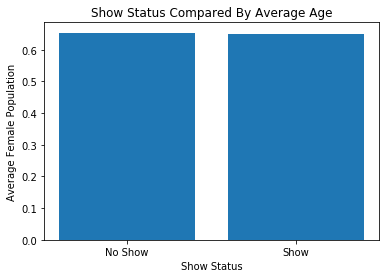

In [16]:
values = [mean_female_noshow, mean_female_show]
labels = ['No Show', 'Show']
plt.bar(labels, values)
plt.title('Show Status Compared By Average Age')
plt.xlabel('Show Status')
plt.ylabel('Average Female Population');

### Does age has a correlation with no show appointments?

This graph gives an idea if there is an association between age and no show appointments. The no show histogram might be skewed more to the right which can indicate that younger people tends to have a higher rate of not showing up. We will explore this further next.

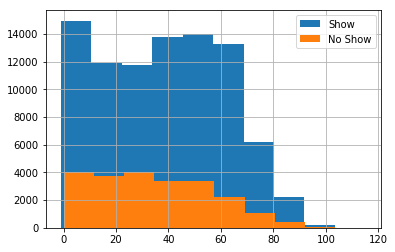

In [17]:
df.Age[show_mask].hist(label='Show')
df.Age[no_show_mask].hist(label='No Show')
plt.legend();

Calculating the mean of no show age and show age tells us that there is a slight association between age and no show appointments.

In [18]:
mean_age_noshow = df.Age[no_show_mask].mean()
mean_age_show = df.Age[show_mask].mean()
mean_age_noshow, mean_age_show

(34.317666562121957, 37.790064393252315)

We can see better here that older people tends to show up more for appointments.

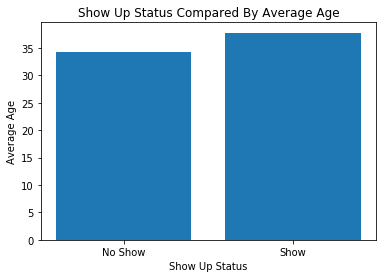

In [19]:
values = [mean_age_noshow, mean_age_show]
labels = ['No Show', 'Show']
plt.bar(labels, values)
plt.title('Show Up Status Compared By Average Age')
plt.xlabel('Show Up Status')
plt.ylabel('Average Age');

### Which age group is associated with no show appointments?

Age will be divided into 5 main groups.

In [20]:
bin_edges = [0, 20, 40, 60, 80, 120]
bin_names = ['0-20', '20-40', '40-60', '60-80', '>80']

This code divides age into different groups based on our earlier specifications.

In [21]:
df['Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)
df.head()

,AppointmentID,Gender,AppointmentDay,Age,No-show,Noshow,Age_group
0,5642903,F,2016-04-29,62,No,False,60-80
1,5642503,M,2016-04-29,56,No,False,40-60
2,5642549,F,2016-04-29,62,No,False,60-80
3,5642828,F,2016-04-29,8,No,False,0-20
4,5642494,F,2016-04-29,56,No,False,40-60


Calculating the mean for each age group shows that people between 0 and 40 tends to skip more appointments.

In [22]:
df.groupby('Age_group').mean().Noshow

Age_group
0-20     0.228090
20-40    0.229790
40-60    0.185865
60-80    0.150030
>80      0.164446
Name: Noshow, dtype: float64

This graph shows how different age group is associated with no show appointment. It also tells us that people between 60 and 80 are the best age group for showing up for appointments.

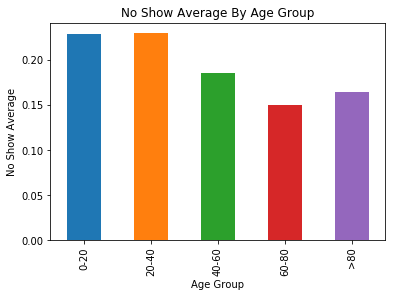

In [23]:
df.groupby('Age_group').mean().Noshow.plot(kind='bar')
plt.title('No Show Average By Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Average');

### Are no show appointments associated with a certian day of the week?

A new column is created to store the name of the day.

In [24]:
df['AppointmentDayName'] = df['AppointmentDay'].dt.day_name()

The no show mean values for each day is calculated. Saturday seems to be in the lead for no show appointments followed by Friday.

In [25]:
mean_noshow_days = df.groupby('AppointmentDayName').mean().Noshow
mean_noshow_days

AppointmentDayName
Friday       0.212261
Monday       0.206471
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: Noshow, dtype: float64

This graph also shows us that Saturday has highest rate of no show appointments. Thursday seems to do the best in terms of show up appointments.

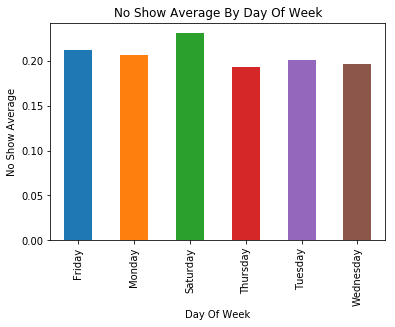

In [26]:
mean_noshow_days.plot(kind='bar')
plt.title('No Show Average By Day Of Week')
plt.xlabel('Day Of Week')
plt.ylabel('No Show Average');

One important factor to take into consideration that the number of appointments for Saturday is very small comparing to other days. This might suggest that Saturday records are not stable enough and Friday has the highest rate of no show appointments.

In [27]:
df.groupby('AppointmentDayName')['AppointmentDayName'].count()

AppointmentDayName
Friday       19019
Monday       22715
Saturday        39
Thursday     17247
Tuesday      25640
Wednesday    25867
Name: AppointmentDayName, dtype: int64

<a id='conclusions'></a>
## Conclusions

In this report some the features of the no show appointment dataset were investigated such as gender, age and the day of the week. Gender seems to have no association with no show appointments. Age have a correlation with no show appointments as younger people tends to skip more appointments. People between 60 and 80 seems to be the best age group for showing up. Saturday is associated with no show up appointments however, taking into consideration that Saturday is not being booked as much as other days, Friday seems to be better in being associated with no show appointments.

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0